### **支持向量机**
支持向量机（Support Vector Machine, SVM）的推导过程围绕如何找到最优分类超平面，以实现最大间隔分类。



##### **1. 问题定义**
假设训练数据集为 $ D = \{ (x_i, y_i) \}_{i=1}^n $，其中 $ x_i \in \mathbb{R}^d $，$ y_i \in \{+1, -1\} $。目标是找到一个超平面：
$$
w^T x + b = 0
$$
使得该超平面能将两类样本正确分开，且间隔（margin）最大。

##### **2. 函数间隔与几何间隔**
- **函数间隔**：样本点 $ (x_i, y_i) $ 到超平面的距离定义为：
  $$
  \hat{\gamma}_i = y_i (w^T x_i + b)
  $$
  所有样本的最小函数间隔为 $ \hat{\gamma} = \min_i \hat{\gamma}_i $。

- **几何间隔**：归一化后的函数间隔（考虑 $ w $ 的模长）：
  $$
  \gamma_i = \frac{y_i (w^T x_i + b)}{\|w\|}, \quad \gamma = \min_i \gamma_i
  $$

**目标**：最大化几何间隔 $ \gamma $，等价于最大化 $ \frac{1}{\|w\|} $。



##### **3. 优化问题建模**
为简化计算，固定函数间隔 $ \hat{\gamma} = 1 $（通过缩放 $ w $ 和 $ b $ 实现），则优化问题转化为：
$$
\max_{w,b} \frac{1}{\|w\|} \quad \text{s.t.} \quad y_i (w^T x_i + b) \geq 1, \quad \forall i
$$
等价于：
$$
\min_{w,b} \frac{1}{2} \|w\|^2 \quad \text{s.t.} \quad y_i (w^T x_i + b) \geq 1
$$



##### **4. 拉格朗日对偶问题**
引入拉格朗日乘子 $ \alpha_i \geq 0 $，构建拉格朗日函数：
$$
\mathcal{L}(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^n \alpha_i \left[ y_i (w^T x_i + b) - 1 \right]
$$

**KKT条件**：
1. 梯度为零：
   $$
   \nabla_w \mathcal{L} = w - \sum_{i=1}^n \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^n \alpha_i y_i x_i
   $$
   $$
   \frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^n \alpha_i y_i = 0 \quad \Rightarrow \quad \sum_{i=1}^n \alpha_i y_i = 0
   $$
2. 原始约束：$ y_i (w^T x_i + b) \geq 1 $
3. 互补松弛条件：$ \alpha_i \left[ y_i (w^T x_i + b) - 1 \right] = 0 $



##### **5. 对偶问题求解**
将 $ w = \sum \alpha_i y_i x_i $ 代入拉格朗日函数，得到对偶问题：
$$
\max_\alpha \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
$$
$$
\text{s.t.} \quad \alpha_i \geq 0, \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

通过求解该凸二次规划问题，得到 $ \alpha_i $。



##### **6. 支持向量与决策函数**
- **支持向量**：对应 $ \alpha_i > 0 $ 的样本，位于间隔边界上（即 $ y_i (w^T x_i + b) = 1 $）。
- **偏置项 $ b $**：利用任意支持向量 $ (x_s, y_s) $ 计算：
  $$
  b = y_s - \sum_{i=1}^n \alpha_i y_i x_i^T x_s
  $$
- **决策函数**：
  $$
  f(x) = \text{sign} \left( \sum_{i=1}^n \alpha_i y_i x_i^T x + b \right)
  $$




---



**具体例子**

 **1. 数据集**
假设有4个样本点，线性可分：
- 正类（$y=+1$）：$x_1=(1,1)$, $x_2=(2,2)$
- 负类（$y=-1$）：$x_3=(-1,-1)$, $x_4=(-2,-2)$

 **2. 对偶问题目标函数**
目标函数为：
$$
\max_\alpha \left( \alpha_1 + \alpha_2 + \alpha_3 + \alpha_4 \right) - \frac{1}{2} \sum_{i,j=1}^4 \alpha_i \alpha_j y_i y_j x_i^T x_j
$$
约束条件：
$$
\alpha_1 + \alpha_2 - \alpha_3 - \alpha_4 = 0 \quad (\text{由} \sum \alpha_i y_i = 0), \quad \alpha_i \geq 0
$$

 **3. 计算内积矩阵**
计算所有样本点间的内积 $x_i^T x_j$：
$$
\begin{align*}
x_1^T x_1 &= 1^2 + 1^2 = 2, \\
x_1^T x_2 &= 1 \times 2 + 1 \times 2 = 4, \\
x_1^T x_3 &= 1 \times (-1) + 1 \times (-1) = -2, \\
&\vdots \\
\text{对称性可知，内积矩阵为：} \\
& \begin{bmatrix}
2 & 4 & -2 & -4 \\
4 & 8 & -4 & -8 \\
-2 & -4 & 2 & 4 \\
-4 & -8 & 4 & 8 \\
\end{bmatrix}
\end{align*}
$$

 **4. 代入目标函数**
目标函数展开后（注意 $y_i y_j$ 的符号）：
$$
\begin{align*}
\text{目标函数} = &\ (\alpha_1 + \alpha_2 + \alpha_3 + \alpha_4) \\
- \frac{1}{2} \Big[ & \alpha_1^2 \cdot 2 + 2\alpha_1 \alpha_2 \cdot 4 + 2\alpha_1 \alpha_3 \cdot (-2)(-1) + 2\alpha_1 \alpha_4 \cdot (-4)(-1) \\
+ & \alpha_2^2 \cdot 8 + 2\alpha_2 \alpha_3 \cdot (-4)(-1) + 2\alpha_2 \alpha_4 \cdot (-8)(-1) \\
+ & \alpha_3^2 \cdot 2 + 2\alpha_3 \alpha_4 \cdot 4 \\
+ & \alpha_4^2 \cdot 8 \Big]
\end{align*}
$$
由于对称性和 $y_i y_j$ 的符号，实际计算中交叉项会简化。

 **5. 简化问题**
观察数据对称性：
- 正类样本 $x_1, x_2$ 和负类样本 $x_3, x_4$ 对称分布在直线 $y=x$ 上。
- 假设 $\alpha_1 = \alpha_2 = \alpha$, $\alpha_3 = \alpha_4 = \beta$（对称性假设）。

**约束条件**：
$$
\alpha + \alpha - \beta - \beta = 0 \quad \Rightarrow \quad 2\alpha - 2\beta = 0 \quad \Rightarrow \quad \alpha = \beta
$$

**目标函数**（代入 $\alpha = \beta$）：
$$
2\alpha + 2\alpha - \frac{1}{2} \left[ 2\alpha^2 \cdot 2 + 2\alpha^2 \cdot 8 + 2\alpha^2 \cdot 2 + 2\alpha^2 \cdot 8 \right] = 4\alpha - \frac{1}{2} (20\alpha^2) = 4\alpha - 10\alpha^2
$$

最大化 $4\alpha - 10\alpha^2$，对 $\alpha$ 求导：
$$
\frac{d}{d\alpha}(4\alpha - 10\alpha^2) = 4 - 20\alpha = 0 \quad \Rightarrow \quad \alpha = 0.2
$$

因此，$\alpha_1 = \alpha_2 = 0.2$，$\alpha_3 = \alpha_4 = 0.2$。

 **6. 计算 $w$ 和 $b$**
- **权重 $w$**：
$$
w = \sum_{i=1}^4 \alpha_i y_i x_i = 0.2 \cdot 1 \cdot (1,1) + 0.2 \cdot 1 \cdot (2,2) + 0.2 \cdot (-1) \cdot (-1,-1) + 0.2 \cdot (-1) \cdot (-2,-2)
$$
$$
= 0.2(1,1) + 0.2(2,2) + 0.2(1,1) + 0.2(2,2) = (0.2+0.4+0.2+0.4, \ 0.2+0.4+0.2+0.4) = (1.2, 1.2)
$$

- **偏置 $b$**：
利用支持向量 $x_1=(1,1)$（满足 $y_i(w^T x_i + b) = 1$）：
$$
1 \cdot (1.2 \cdot 1 + 1.2 \cdot 1 + b) = 1 \quad \Rightarrow \quad 2.4 + b = 1 \quad \Rightarrow \quad b = -1.4
$$

 **7. 最终决策函数**
$$
f(x) = \text{sign}(1.2x^{(1)} + 1.2x^{(2)} - 1.4)
$$
即超平面为 $1.2x_1 + 1.2x_2 - 1.4 = 0$，简化为 $x_1 + x_2 = \frac{7}{6}$。

---



### 软间隔与松弛变量
若数据存在噪声，引入松弛变量 $ \xi_i \geq 0 $ 和惩罚参数 $ C $，优化问题变为：
$$
\min_{w,b,\xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$
$$
\text{s.t.} \quad y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$
对应的拉格朗日乘子 $ \alpha_i $ 需满足 $ 0 \leq \alpha_i \leq C $。

$ C $：` 自己指定的惩罚系数 ， 大 不能有误差  ， 小 可以有误差`

$\xi_i $：`是一个变量 ，不同的样本对应的值不同 `


- 构建拉格朗日函数

引入拉格朗日乘子 $\alpha_i \geq 0$ 和 $\mu_i \geq 0$ 分别处理两类约束：
$$
\mathcal{L}(w,b,\xi,\alpha,\mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \alpha_i \left[ y_i(w^T x_i + b) -1 + \xi_i \right] - \sum_{i=1}^n \mu_i \xi_i
$$


- 对原始变量求导并消去
  
对 $w$ 求导：
  $$
  \nabla_w \mathcal{L} = w - \sum_{i=1}^n \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^n \alpha_i y_i x_i
  $$

**对 $b$ 求导**：
  $$
  \frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^n \alpha_i y_i = 0 \quad \Rightarrow \quad \sum_{i=1}^n \alpha_i y_i = 0
  $$
**对 $\xi_i$ 求导**：
  $$
  \frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \quad \Rightarrow \quad \mu_i = C - \alpha_i
  $$
  结合 $\mu_i \geq 0$，得约束：
  $$
  0 \leq \alpha_i \leq C
  $$


- 代入拉格朗日函数得对偶问题


将 $w = \sum \alpha_i y_i x_i$ 和 $\mu_i = C - \alpha_i$ 代入原函数，消去 $w, b, \xi, \mu$：
$$
\mathcal{L} = \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
$$
最终对偶优化问题为：
$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
$$
满足：
$$
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

---

### 非线性可分与核技巧
对于非线性可分数据，引入核函数 $ K(x_i, x_j) = \phi(x_i)^T \phi(x_j) $ 将输入空间映射到高维特征空间。此时对偶问题变为：
$$
\max_\alpha \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

常用核函数包括多项式核、`高斯核（RBF）`等。

# SVM

In [175]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
X = iris['data'][: , (2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# 核函数 kernel =  ['linear'线性, 'poly', 'rbf'高斯, 'sigmoid', 'precomputed']
# C :惩罚系数   inf 无穷大  - inf 无穷小
hard_svm_clf = SVC(kernel='linear', C = float('inf') )
hard_svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

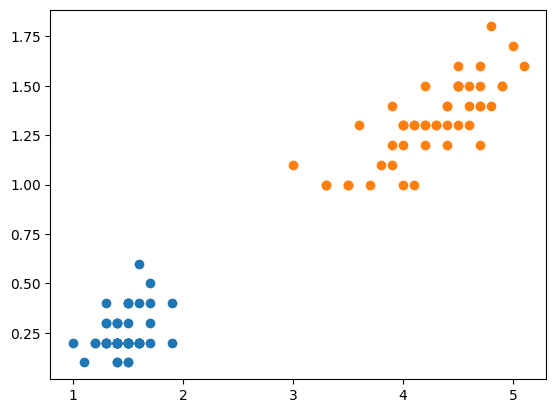

In [176]:
plt.scatter( X[:,0][y==0], X[:,1][y==0] )
plt.scatter(X[:,0][y==1],X[:,1][y==1] )

In [177]:
hard_svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [178]:
hard_svm_clf.intercept_

array([-3.78823471])

In [179]:

def plot_decision_boundary(model , xmin , xmax, sv = True):
    w = model.coef_[0]  # 形状 (2,)
    b = model.intercept_[0]
    # 求出边界的坐标 x0w[0] + x1w[1] + b = 0
    x0 = np.linspace(xmin,xmax,200)

    # 计算决策边界：w[0]*x0 + w[1]*x1 + b = 0 → x1 = (-w[0]*x0 - b)/w[1]
    x1 = (-w[0] * x0 - b) / w[1]  # 结果形状 (200,)
    
    # 计算间隔（基于权重范数：margin = 1 / ||w||）
    margin = 1 / np.linalg.norm(w)
    # x1 = (-w[0][0]*x0 - b)/w[0][1]
    # # 过支持向量的虚线，由分界线上下移动1 / w [1]个单位
    # marrgin = 1 / w[0][1]
    gutter_up = x1 + margin
    gutter_down = x1 - margin
    if sv:
        svs = model.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors = '#FFAAAA')
    plt.plot(x0,x1,'k-')
    plt.plot(x0,gutter_up,'k--')
    plt.plot(x0,gutter_down,'k--')
    

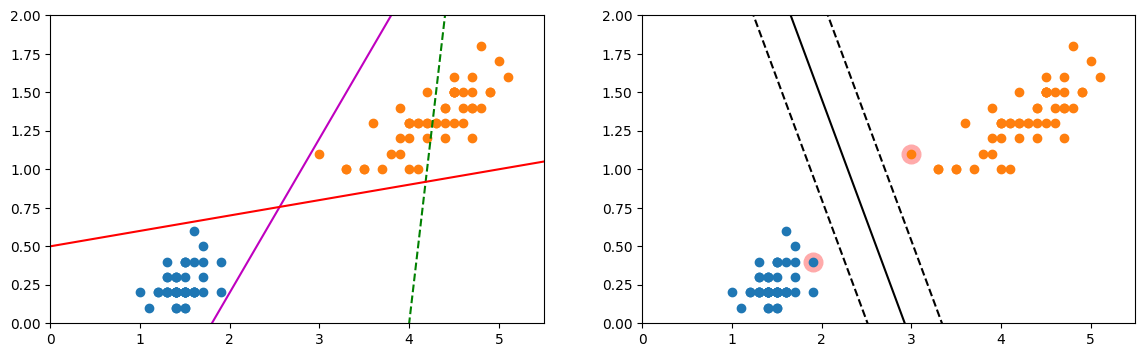

In [180]:
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 -20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 +0.5

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter( X[:,0][y==0], X[:,1][y==0] )
plt.scatter(X[:,0][y==1],X[:,1][y==1] )
plt.plot(x0,pred_1,'g--')
plt.plot(x0,pred_2,'m-')
plt.plot(x0,pred_3,'r-')
plt.axis([0,5.5,0,2])
plt.subplot(122)
plot_decision_boundary(hard_svm_clf,0,5.5)
plt.scatter( X[:,0][y==0], X[:,1][y==0] )
plt.scatter(X[:,0][y==1],X[:,1][y==1] )
plt.axis([0,5.5,0,2])
plt.show()

# 软间隔

In [181]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris['data'][: , (2,3)]
y = (iris['target'] == 2).astype(np.float64)


svm_clf = Pipeline([
    ('Std',StandardScaler()),
    ('linearsvm',LinearSVC(C=1))
]) 

svm_clf.fit(X,y)

Pipeline(steps=[('Std', StandardScaler()), ('linearsvm', LinearSVC(C=1))])

In [182]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [183]:
scaler = StandardScaler()
svm1 = LinearSVC(C=1,random_state=42)
svm2 = LinearSVC(C=100,random_state=42)

scaler.fit(X)
scaled_svm1 = Pipeline((
    ('Std',StandardScaler()),
    ('linearsvm',svm1)
)) 
scaled_svm2 = Pipeline((
    ('Std',StandardScaler()),
    ('linearsvm',svm2)
)) 
svm1.fit(X,y)
svm2.fit(X,y)
scaled_svm1.fit(X,y)
scaled_svm2.fit(X,y)


Pipeline(steps=[('Std', StandardScaler()),
                ('linearsvm', LinearSVC(C=100, random_state=42))])

In [184]:
b1 = svm1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm1.coef_[0] / scaler.scale_  # 权重逆标准化
w2 = svm2.coef_[0] / scaler.scale_

# 更新模型参数
svm1.intercept_ = np.array([b1])
svm2.intercept_ = np.array([b2])

svm1.coef_ = np.array([w1])
svm2.coef_ = np.array([w2])

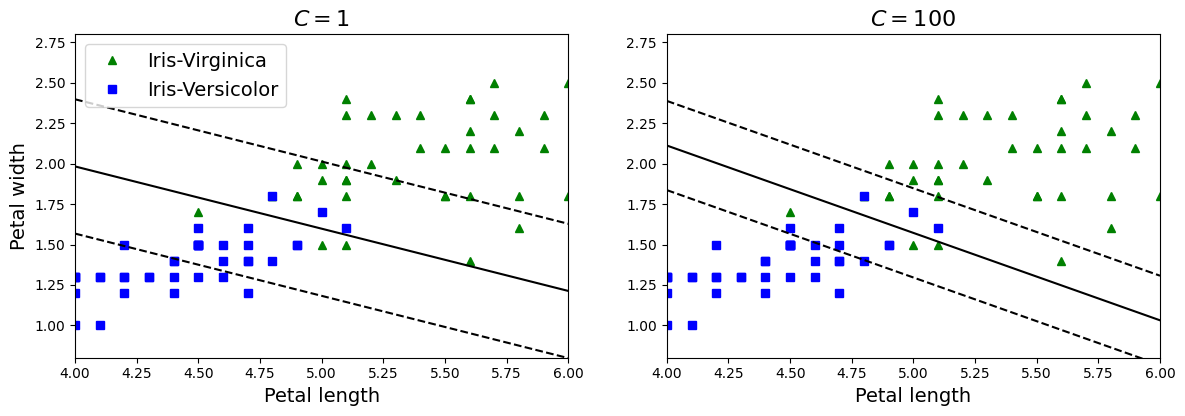

In [185]:
plt.figure(figsize=(14, 4.2))

# 左侧子图（C=1）
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_decision_boundary(svm1, 4, 6, sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

# 右侧子图（C=100）
plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_decision_boundary(svm2, 4, 6, sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.show()


# 非线性支持向量机

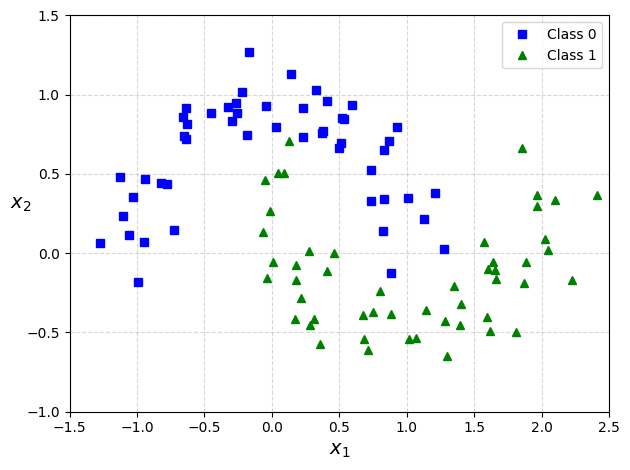

In [ ]:
from sklearn.datasets import make_moons

# 生成模拟数据
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    # 绘制类别0（蓝色方块）
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Class 0")
    # 绘制类别1（绿色三角形）
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Class 1")
    # 设置坐标轴范围和标签
    plt.axis(axes)
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.xlabel(r'$x_1$', fontsize=14)  # 修正 LaTeX 公式
    plt.ylabel(r'$x_2$', fontsize=14, rotation=0)
    plt.legend()

# 调用绘图函数并显示图像
plot_dataset(X, y, axes=[-1.5, 2.5, -1, 1.5])
# 自动调整子图的布局，防止标签、标题等元素重叠或超出显示范围。
plt.tight_layout()
plt.show()

In [187]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm_clf = Pipeline([
    ('poly_feature' , PolynomialFeatures(degree=3)),
    ('scaler' , StandardScaler()),
    ('svm' , LinearSVC(C=10,loss='hinge'))
])

poly_svm_clf.fit(X,y)

d:\Anaconda\envs\python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)


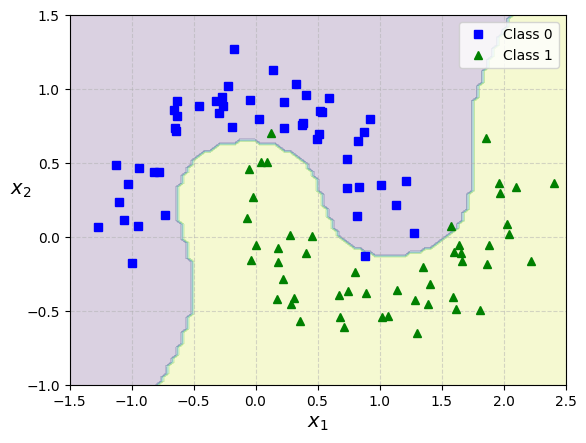

In [188]:
def plot_predictions(clf , axes): 
    x0 = np.linspace(axes[0],axes[1],100)
    y0 = np.linspace(axes[2],axes[3],100)

    x,y = np.meshgrid(x0,y0)
    X = np.c_[x.ravel(),y.ravel()]
    y_pred = clf.predict(X).reshape(x.shape)
    plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)

plot_predictions(poly_svm_clf , [-1.5,2.5,-1,1.5]) 
plot_dataset(X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.show()

# 核函数

核函数 kernel =  ['linear'线性, 'poly'多项式, 'rbf'高斯 径向基函数, 'sigmoid', 'precomputed']

In [190]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler" ,StandardScaler()),
    ("svm_clf" , SVC(kernel='poly', degree=3, coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [191]:
poly10_kernel_svm_clf = Pipeline([
    ("scaler" ,StandardScaler()),
    ("svm_clf" , SVC(kernel='poly', degree=10, coef0=100,C=5))
])
poly10_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)
C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)


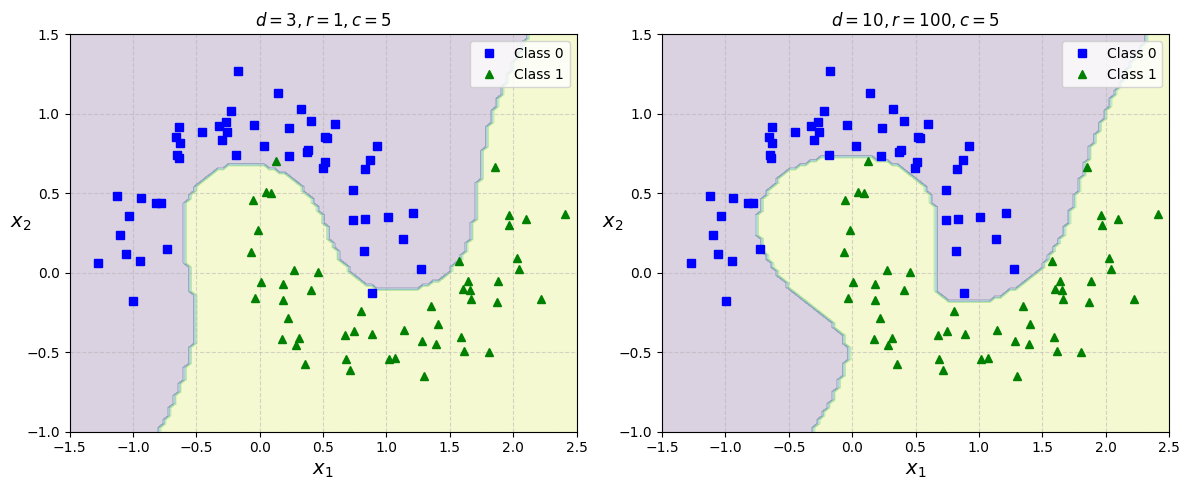

In [195]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf , [-1.5,2.5,-1,1.5]) 
plot_dataset(X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3 ,r=1 ,c=5 $")
plt.subplot(122)
plot_predictions(poly10_kernel_svm_clf , [-1.5,2.5,-1,1.5]) 
plot_dataset(X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10 ,r=100, c=5 $")
plt.tight_layout()
plt.show()

## 高斯核函数
##### **1. 数学定义与公式**
高斯核函数通过非线性映射将数据投影到高维空间，其数学表达式为：
$$
K(\mathbf{x}, \mathbf{x'}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{x'}\|^2\right)
$$
其中：
- $\mathbf{x}, \mathbf{x'}$ 是输入样本。
- $\gamma = \frac{1}{2\sigma^2}$ 是核函数的超参数，控制函数的宽度（$\sigma$ 越大，函数越平缓）。



##### **2. 核心作用**
- **非线性分类**：通过核技巧（Kernel Trick），隐式将数据映射到高维空间，无需显式计算高维特征。
- **局部敏感**：相似样本的核值接近 1，差异大的样本核值接近 0，适用于捕捉局部模式。



##### **3. 参数 $\gamma$ 的选择**
- **小 $\gamma$（大 $\sigma$）**：决策边界更平滑，模型简单，可能欠拟合。
- **大 $\gamma$（小 $\sigma$）**：决策边界复杂，对训练数据敏感，可能过拟合。
- **调参方法**：网格搜索（Grid Search）结合交叉验证（Cross-Validation）。

---



**1. 核技巧的基本思想**
核技巧的核心在于**避免显式计算高维特征**，而是通过核函数直接在原始空间中计算高维空间中的内积。例如，对于两个样本点 $\mathbf{x}$ 和 $\mathbf{x'}$，高斯核函数 $K(\mathbf{x}, \mathbf{x'})$ 等价于它们在某个高维（甚至无限维）特征空间中的内积：
$$
K(\mathbf{x}, \mathbf{x'}) = \langle \phi(\mathbf{x}), \phi(\mathbf{x'}) \rangle
$$
其中 $\phi(\mathbf{x})$ 是隐式的特征映射函数。

**2. 高斯核的隐式映射**
高斯核函数对应的特征映射 $\phi(\mathbf{x})$ 是**无限维**的，其具体形式可以通过泰勒展开揭示：
$$
K(\mathbf{x}, \mathbf{x'}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{x'}\|^2\right) = \sum_{k=0}^{\infty} \frac{(-\gamma)^k}{k!} \|\mathbf{x} - \mathbf{x'}\|^{2k}
$$
展开后的每一项对应一个**多项式特征组合**（例如二次项、四次项等），但高斯核通过指数函数的性质自动为这些多项式赋予权重，无需手动设计。



**3. 映射的直观理解**
假设原始数据为二维 $\mathbf{x} = (x_1, x_2)$，通过高斯核隐式映射到高维空间后，数据可能包含以下特征：
$$
\phi(\mathbf{x}) = \left[\exp(-\gamma \|\mathbf{x} - \mathbf{c}_1\|^2), \exp(-\gamma \|\mathbf{x} - \mathbf{c}_2\|^2), \dots \right]
$$
其中 $\mathbf{c}_1, \mathbf{c}_2, \dots$ 是隐式的中心点（如训练样本点）。每个维度对应一个以某中心点为基准的高斯函数值，数据点越接近某个中心，该维度上的值越大。



**4. 映射的数学验证**
高斯核的隐式映射可以通过**再生核希尔伯特空间（RKHS）**严格定义。在该空间中，每个样本 $\mathbf{x}$ 被映射为一个函数：
$$
\phi(\mathbf{x}) = \exp\left(-\gamma \|\cdot - \mathbf{x}\|^2\right)
$$
两个样本的内积即为核函数值：
$$
\langle \phi(\mathbf{x}), \phi(\mathbf{x'}) \rangle = K(\mathbf{x}, \mathbf{x'}).
$$

#### **参数 $\gamma$ 的影响**
- **小 $\gamma$**：映射后的特征空间维度较低，决策边界平滑（欠拟合风险）。
- **大 $\gamma$**：映射后的特征空间维度极高，决策边界复杂（过拟合风险）。

---




##### **1. 支持向量机（SVM）中的中心点**
- **自动选择机制**：  
  在 SVM 中使用高斯核时，所有训练样本均可视为隐式的中心点，但最终只有**支持向量（Support Vectors, SVs）**对模型起作用。  
  - **支持向量的确定**：通过优化过程（如最大化间隔）自动选择，依赖数据的分布和分类边界的重要性。  
  - **非随机性**：只要训练数据和超参数（如 $C$ 和 $\gamma$）固定，支持向量的选择是**确定性的**。


#####  **2. 其他方法中的中心点选择**
在需要显式选择中心点的场景（如 RBF 网络、核密度估计等），常见的策略包括：
- **随机选择**：  
  从训练数据中随机抽取部分样本作为中心点。  
  - **特点**：简单高效，但可能忽略数据的结构信息，导致模型性能不稳定。  
- **聚类方法（如 K-means）**：  
  使用聚类算法（如 K-means）选取代表性中心点。  
  - **特点**：基于数据分布选择中心点，更符合实际结构，减少随机性。  
- **均匀分布**：  
  在输入空间内按均匀网格分布中心点。  
  - **特点**：适用于数据分布未知的场景，但可能冗余或覆盖不全。



#####  **3. 参数调优与中心点的影响**
- **高斯核参数 $\gamma$**：  
  无论中心点如何选择，$\gamma$ 的取值会显著影响模型的局部敏感性：  
  - 大 $\gamma$：中心点影响范围小，模型更关注局部特征（可能过拟合）。  
  - 小 $\gamma$：中心点影响范围大，模型更平滑（可能欠拟合）。  
- **超参数调优**：  
  通过交叉验证或网格搜索优化 $\gamma$ 和中心点数量，可提升模型泛化能力。



#####  **实际应用建议**
1. **SVM 中的高斯核**：  
   - 无需手动选择中心点，依赖支持向量的自动筛选。  
   - 确保数据标准化（高斯核对尺度敏感）。  

2. **RBF 网络等显式方法**：  
   - 优先使用**聚类方法（如 K-means）**选择中心点，避免纯随机选择。  
   - 结合交叉验证确定最佳中心点数量和 $\gamma$。



#####  **示例对比**
| **场景**               | **中心点选择方法**       | **随机性** | **稳定性** |
|------------------------|--------------------------|------------|------------|
| **SVM 高斯核**         | 支持向量自动选择         | 无         | 高         |
| **RBF 网络（随机）**   | 随机抽取训练样本         | 有         | 低         |
| **RBF 网络（K-means）**| 聚类算法选择             | 无         | 高         |



#####  **总结**
- **SVM 高斯核**：中心点由支持向量自动确定，非随机且稳定。  
- **显式中心点选择**：推荐基于数据结构的聚类方法，减少随机性影响。  
- **参数调优**：始终优化 $\gamma$ 和中心点数量以平衡模型复杂度。  



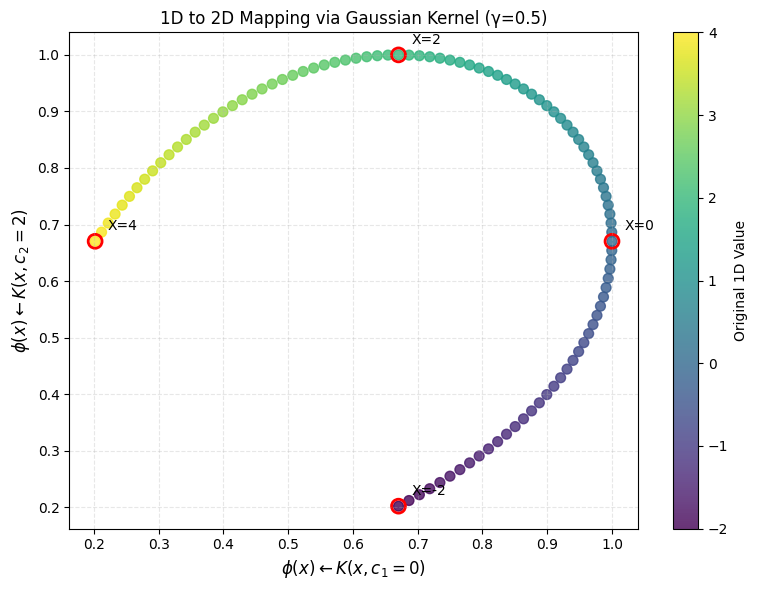

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义高斯核函数
def gaussian_kernel(x, center, gamma=1.0):
    return np.exp(-gamma * (x - center)**2)

# 生成一维数据
X = np.linspace(-2, 4, 100)  # 生成从-2到4的100个点

# 选择两个中心点（映射到二维的坐标轴）
c1, c2 = 0.0, 2.0  # 中心点参考图中的 X3^0 和 X2

# 计算映射后的二维坐标
gamma = 0.1  # 控制高斯核的宽度  gamma 越小越好
X_mapped = np.array([
    [gaussian_kernel(x, c1, gamma), gaussian_kernel(x, c2, gamma)] 
    for x in X
])

# 绘制映射效果
plt.figure(figsize=(8, 6))
plt.scatter(X_mapped[:, 0], X_mapped[:, 1], c=X, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Original 1D Value')

# 标注关键点（参考图中的 X1, X2, X3）
key_points = [-2, 0, 2, 4]
for x in key_points:
    phi_x = [gaussian_kernel(x, c1, gamma), gaussian_kernel(x, c2, gamma)]
    plt.scatter(phi_x[0], phi_x[1], s=100, edgecolors='red', linewidths=2, facecolors='none')
    plt.text(phi_x[0]+0.02, phi_x[1]+0.02, f'X={x}', fontsize=10, ha='left')

plt.xlabel(r'$\phi(x) \leftarrow K(x, c_1=0)$', fontsize=12)
plt.ylabel(r'$\phi(x) \leftarrow K(x, c_2=2)$', fontsize=12)
plt.title('1D to 2D Mapping via Gaussian Kernel (γ=0.5)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)
C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)
C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)
C:\Users\74203\AppData\Local\Temp\ipykernel_15936\3630503111.py:8: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(x,y,y_pred,camp = plt.cm.brg,alpha = 0.2)


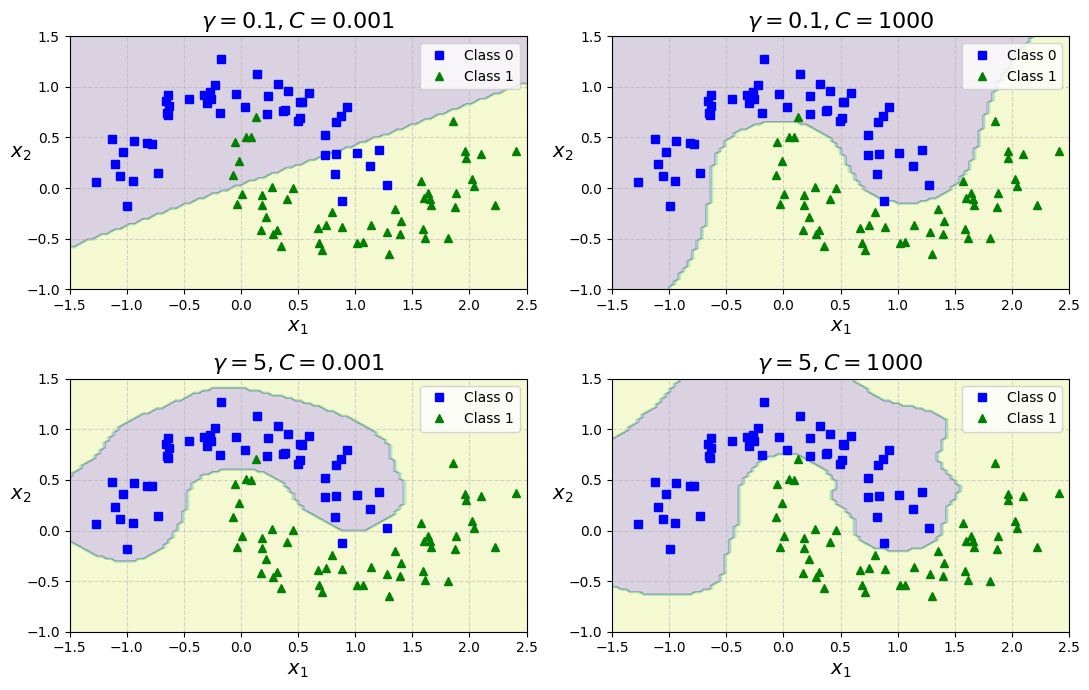

In [201]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = ((gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2))

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(2, 2, i + 1)  # 修正子图编号方式
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    
plt.tight_layout()
plt.show()